In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
import matplotlib.pyplot as plt

: 

# Parte 1: Introducción

### Ejercicio 1
Generar un tensor llamado **x** cuyo contenido sea el siguiente:

![Imgur](https://i.imgur.com/rfaKGUG.png)

In [2]:
tensor = tf.constant([[[ 0,  2,  4,  6,  8],
                       [10, 12, 14, 16, 18],
                       [20, 22, 24, 26, 28]],

                      [[30, 32, 34, 36, 38],
                       [40, 42, 44, 46, 48],
                       [50, 52, 54, 56, 58]]])
tensor

NameError: name 'tf' is not defined

### Ejercicio 2
Realizar los cambios necesarios en los siguientes tensores para que sea posible multiplicar cada columna del tensor "X" por el vector "y".

In [ ]:
X = tf.ones((2, 4, 5, 3))
y = tf.constant([1, 2, 3, 4, 5])

# Modifica la forma de 'y' para que sea compatible con 'X'
y_reshaped = tf.reshape(y, [1, 1, 5, 1])

# Expande 'y_reshaped' para que coincida con las dimensiones de 'X'
y_expanded = tf.broadcast_to(y_reshaped, [2, 4, 5, 3])
y_expanded = tf.cast(y_expanded, tf.float32)

# Multiplica 'X' e 'y_expanded' elemento a elemento
result = X * y_expanded
print(result)


tf.Tensor(
[[[[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]]


 [[[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [3. 3. 3.]
   [4. 4. 4.]
   [5. 5. 5.]]]], shape=(2, 4, 5, 3), dtype=float32)


### Ejercicio 3
Sobre Tensores, implemente las operaciones Suma, Producto Tensorial y Contraccion Tensorial. Para ello agregue las operaciones tensoriales que sean pertinentes.

#### **Fórmulas**

La suma de tensores de igual *shape* se define como:

$A_{ij} + B_{ij} = C_{ij}$

El producto tensorial entre $A$ de *shape* $(m, n)$ por una matriz de *shape* $(n,q)$ se define como:

$C_{ij} = ∑_k A_{ik}B_{kj}$

La contracción tensorial para el tensor de *shape* $(m=2,n=2,p=2)$ puede ser:

$C_i = \sum_{j=k}T_{ijk}$

Para [ [ [ 1 , 2 ] , [ 3 , 4 ] ] , [ [ 5 , 6 ] , [ 7 , 8 ] ] ], tenemos entonces que:

- $C_{i=1} = \sum_{j,k}T_{1jk}= T_{1,1,1}+T_{1,1,2}+T_{1,2,1}+T_{1,2,2}=1+2+3+4$
- $C_{i=2} = \sum_{j,k}T_{2jk}= T_{2,1,1}+T_{2,1,2}+T_{2,2,1}+T_{2,2,2}=5+6+7+8$

In [ ]:
# Suma de tensores
def tensor_sum(t1, t2):
  if t1.shape != t2.shape:
    raise ValueError("Los tensores deben tener la misma forma para la suma.")
  result = np.zeros_like(t1)
  for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
      result[i, j] = t1[i, j] + t2[i, j]
  return result

# Producto tensorial
def tensor_product(t1, t2):
  result = np.zeros((t1.shape[0], t2.shape[1]))
  for i in range(t1.shape[0]):
    for j in range(t2.shape[1]):
      for k in range(t1.shape[1]):
        result[i, j] += t1[i, k] * t2[k, j]
  return result


# Contracción tensorial
def tensor_contraction(t, axis1, axis2):
  if axis1 == axis2:
    raise ValueError("Los ejes no pueden ser iguales.")
  result = np.sum(t, axis=(axis1, axis2))
  return result

# Ejemplo de suma
t1 = np.array([[1, 2], [3, 4]])
t2 = np.array([[5, 6], [7, 8]])
print(tensor_sum(t1, t2))

# Ejemplo de producto tensorial
t1 = np.array([[1, 2], [3, 4]])
t2 = np.array([[5, 6], [7, 8]])
print(tensor_product(t1, t2))

# Ejemplo de contracción tensorial
t = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(t)
print(tensor_contraction(t, 1, 2))




[[ 6  8]
 [10 12]]
[[19. 22.]
 [43. 50.]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[10 26]


### Ejercicio 4
Descargar y estudiar el dataset de IMDB de Keras (num_words = 10000)
Separar el dataset en conjuntos de train y test

In [ ]:
from tensorflow.keras.datasets import imdb

# Según https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# el dataset de IMDB tiene 50k reseñas de películas, y está compuesto por:
# - Review: Hace referencia a la reseña de cada película
# - Sentiment: Valor binario que indica si la reseña fue positiva o negativa

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
max([max(sequence) for sequence in train_data])

9999

## Ejercicio 5
Dentro del conjunto de Test extraer el primer review positivo y el primer negativo. Hacer la codificacion back-to-text de cada uno de ellos

In [ ]:
# Extraer el primer review positivo y el primer negativo
positive_index = next((i for i, label in enumerate(test_labels) if label == 1), None)
negative_index = next((i for i, label in enumerate(test_labels) if label == 0), None)

positive_review = test_data[positive_index]
negative_review = test_data[negative_index]

# word_index es un diccionario que mapea palabras a índices enteros
word_index = imdb.get_word_index()

# Se revierte, mapeando índices enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodificación back-to-text para la review positiva
decoded_positive_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in positive_review])

# Decodificación back-to-text para la review negativa
decoded_negative_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in negative_review])

# Los índices están desplazados por 3 ya que 0, 1, y 2 índices reservados para “padding,”
# “start of sequence,” y “unknown.”

print("Primer review positivo:", decoded_positive_review)
print("Primer review negativo:", decoded_negative_review)

Primer review positivo: ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atm

## Ejercicio 6
Sin hacer uso de las librerias de Keras, crear una red neuronal feed-forward fully_connected con la siguiente arquitectura: capa de entrada - 16 -16 - capa de salida.
(Programar todas las funciones necesarias)


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

# Inicializar los pesos de forma aleatoria
input_size = 10000  # Tamaño de entrada (vocabulario)
hidden_size1 = 16
hidden_size2 = 16
output_size = 1

weights_input_hidden1 = np.random.randn(input_size, hidden_size1)
bias_hidden1 = np.zeros((1, hidden_size1))

weights_hidden1_hidden2 = np.random.randn(hidden_size1, hidden_size2)
bias_hidden2 = np.zeros((1, hidden_size2))

weights_hidden2_output = np.random.randn(hidden_size2, output_size)
bias_output = np.zeros((1, output_size))

# Forward pass
def forward_pass(X):
  hidden_layer1_input = np.dot(X, weights_input_hidden1) + bias_hidden1
  hidden_layer1_output = sigmoid(hidden_layer1_input)

  hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
  hidden_layer2_output = sigmoid(hidden_layer2_input)

  output_layer_input = np.dot(hidden_layer2_output, weights_hidden2_output) + bias_output
  output = sigmoid(output_layer_input)

  return output, hidden_layer1_output, hidden_layer2_output

# Ejemplo de uso
# Supongamos que 'input_data' es un vector de entrada de tamaño (1, 10000)
# output, _, _ = forward_pass(input_data)


## Ejercicio 7
Tomar un lote random de 100 reviews en el conjunto de train y hacer forward por su red neuronal estimando el error para ese lote. Definir la funcion de error pertinente.

### Resolución

No es posible alimentar listas de enteros a una red neuronal. Tienen todas diferentes longitudes, pero una red neuronal espera procesar lotes contiguos de datos. Por eso, se debe convertir las listas en tensores.

Para ello, se va a utilizar *Multi-hot*, que codifica las listas para convertirlas en vectores de ceros y unos. encode your lists to turn them into vectors of 0s and 1s.

Esto significa, por ejemplo, convertir a la secuencia [8,5] en un vector de dimension 10000 que tendrían todos ceros, a excepción de los índices 8 y 5, que contendrían unos. Así, se podría usar una capa densa, capaz de manejar datos de un vector de tipo *float*.

In [ ]:
# Seleccionar un lote aleatorio de 100 reviews
batch_size = 100
indices = np.random.choice(train_data.shape[0], batch_size, replace=False)
batch_data = train_data[indices]
batch_labels = train_labels[indices]

# Preprocesar los datos del lote (vectorizar)
def vectorize_sequences(sequences, dimension=10000):

  # Crea una matriz de todos ceros de shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))

  # Convierte los índices específicos de results[i] a unos
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

batch_data = vectorize_sequences(batch_data)
batch_labels = np.asarray(batch_labels).astype('float32')

# Forward pass para el lote
predictions, _, _ = forward_pass(batch_data)

# Función de error (binary crossentropy)
def binary_crossentropy(y_true, y_pred):
  epsilon = 1e-7  # Para evitar errores de logaritmo
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Calcular el error para el lote
error = binary_crossentropy(batch_labels, predictions)
print("Error en el lote:", error)


Error en el lote: 2.2937512290079054


## Ejercicio 8
Usando Keras defina la misma red neuronal anterior

In [ ]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Ejercicio 9
Entrene el modelo definido usando un batchs de 512 elementos y 20 epoch. Recuerden generar los conjuntos de validacion y train.

In [ ]:
batch_size = 512
indices = np.random.choice(train_data.shape[0], batch_size, replace=False)
batch_data = train_data[indices]
batch_labels = train_labels[indices]

# Dividir los datos en conjuntos de entrenamiento y validación
val_split = 10000
x_val = batch_data[:val_split]
partial_x_train = batch_data[val_split:]

y_val = batch_labels[:val_split]
partial_y_train = batch_labels[val_split:]

x_val = vectorize_sequences(batch_data)
partial_x_train = vectorize_sequences(batch_data)

y_val = np.asarray(batch_labels).astype('float32')
partial_y_train = np.asarray(batch_labels).astype('float32')

# Verificar las formas de los arrays
print("Forma de partial_x_train:", partial_x_train.shape)
print("Forma de partial_y_train:", partial_y_train.shape)


# Entrenar el modelo
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Forma de partial_x_train: (512, 10000)
Forma de partial_y_train: (512,)
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5156 - loss: 0.6927 - val_accuracy: 0.7246 - val_loss: 0.6626
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.7246 - loss: 0.6626 - val_accuracy: 0.5449 - val_loss: 0.6409
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5449 - loss: 0.6409 - val_accuracy: 0.8594 - val_loss: 0.5876
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8594 - loss: 0.5876 - val_accuracy: 0.8652 - val_loss: 0.5337
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8652 - loss: 0.5337 - val_accuracy: 0.9727 - val_loss: 0.4889
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9727 - loss: 0.4889 - val_accuracy: 0.8691 - val_loss: 0.4587
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8691 - loss: 0.4587 - val_accuracy: 0.9551 - val_loss: 0.4568
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - 

## Ejercicio 10
Plotear las curvas de **Training vs Validation Loss** con la loss por cada epochs
Plotear las curvas de **Training vs Validation Accuracy** con el accuracy por cada epochs

Haga un resumen con las conclusiones observadas en ambas graficas

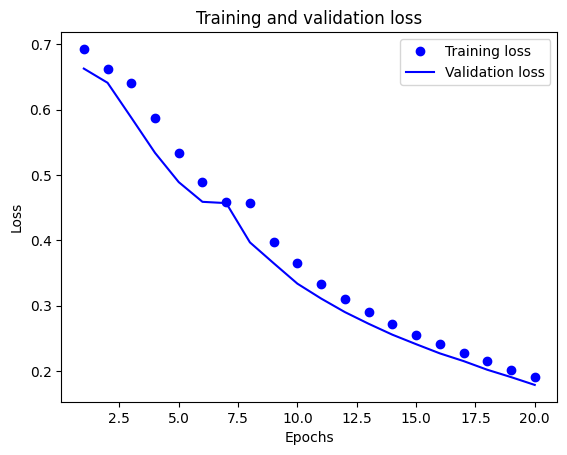

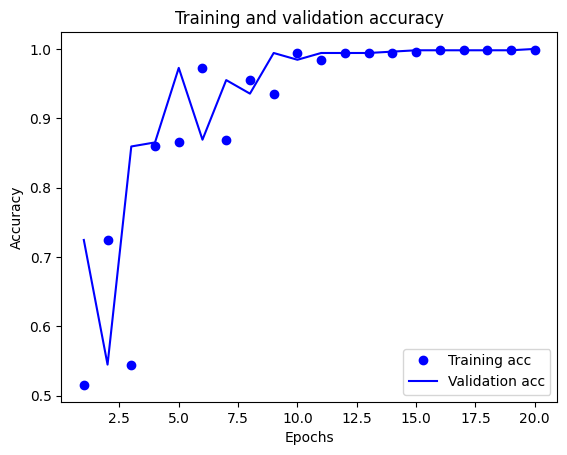

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


En el primer gráfico se observa que, al realizar 20 EPOCHS sobre todas las muestras de los datos de entrenamiento, el error ha disminuido con  cada iteración tanto con los datos de entrenamiento como los de validación, llegando a un error de aproximadamente 0.18.

En el segundo gráfico, para los primeros 10 EPOCHS, el *accurracy* para los datos de entrenamiento y los datos de validación ha ido oscilando entre distintos valores con una tendencia al crecimiento. Para los últimos 10 EPOCHS, se han visto valores muy cercanos a 1 para los conjuntos de entrenamiento y validación.

Es posible ver que en el último EPOCH se han obtenido muy buenos resultados para los conjuntos de entrenamiento y validación, y no han aparecido señales de overfitting: el modelo se comportó muy bien en ambos conjuntos de datos.